Finding Contours

In this notebook, we cover edge detection techniques and contours

In [ ]:
import numpy as np
import cv2
from numpy import array 
import random
from google.colab.patches import cv2_imshow
images_path = '/content/drive/MyDrive/Tutorials/MUST0201/Images/'

Contours are simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
See, there are three arguments in cv.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs a modified image, the contours and hierarchy.

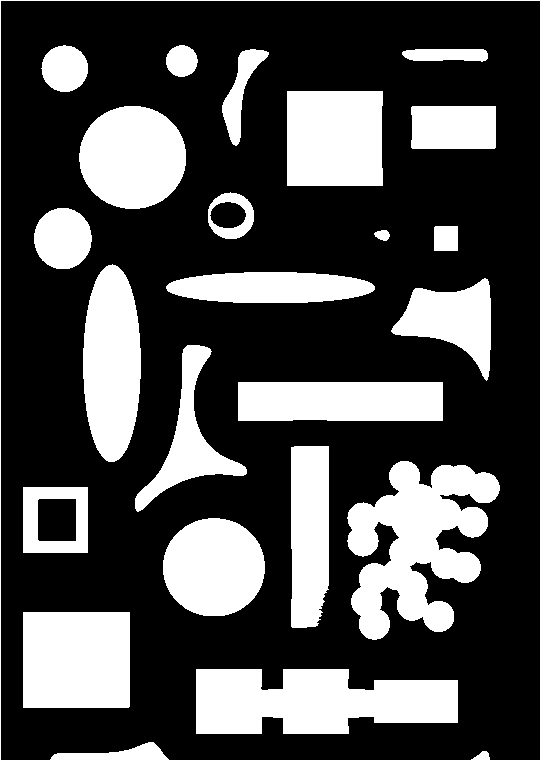

All Contours


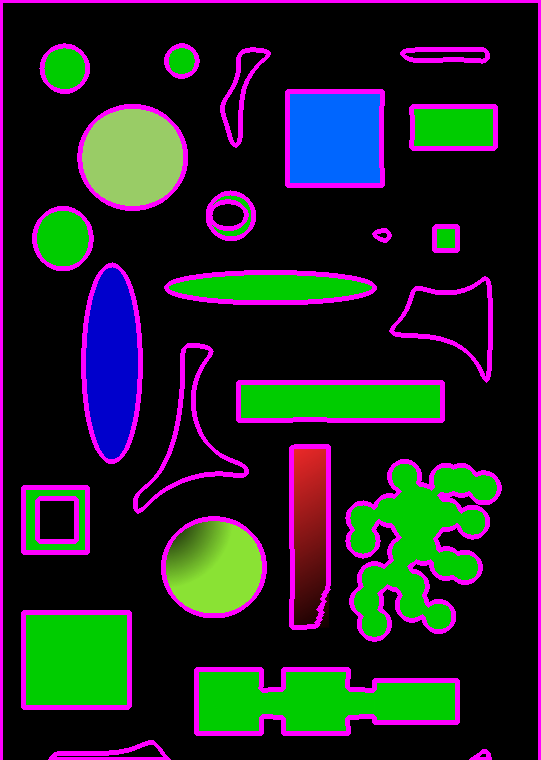

Draw 2nd Contour


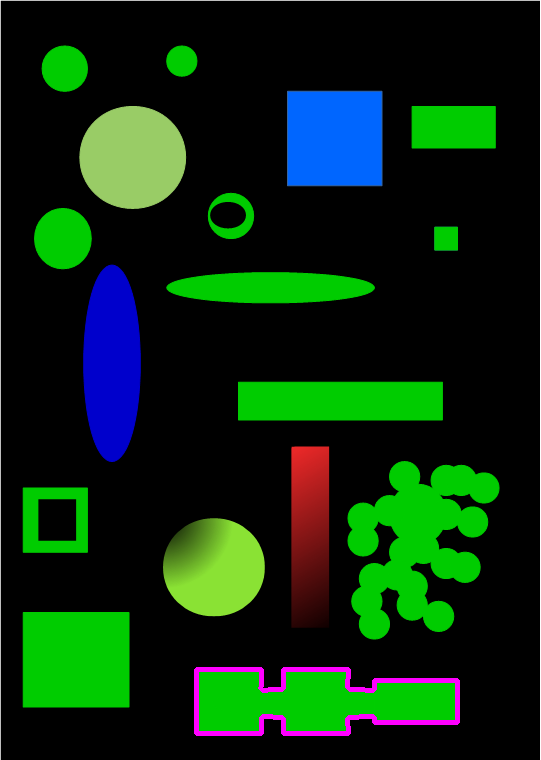

In [ ]:

img = cv2.imread(images_path+'blob.png',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2_imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

#Pasing -1 as index will retrieve all contours
cv2.drawContours(img2, contours, index, color, thickness)
print("All Contours")
cv2_imshow(img2)

print("Draw 2nd Contour")
cv2.drawContours(img, contours, 2, color, thickness)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Finding Area, Perimeter and Centorid:**
We can find the center of the blob using moments in OpenCV. But first of all, we should know what exactly Image moment is all about. Image Moment is a particular weighted average of image pixel intensities, with the help of which we can find some specific properties of an image, like radius, area, centroid etc. To find the centroid of the image, we generally convert it to binary format and then find its center.

The centroid is given by the formula:-

  \[C_x = \cfrac{M_{10}}{M_{00}}\]
  \[C_y = \cfrac{M_{01}}{M_{00}}\]
C_x is the x coordinate and C_y is the y coordinate of the centroid and M denotes the Moment.
More operations can be found at https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.

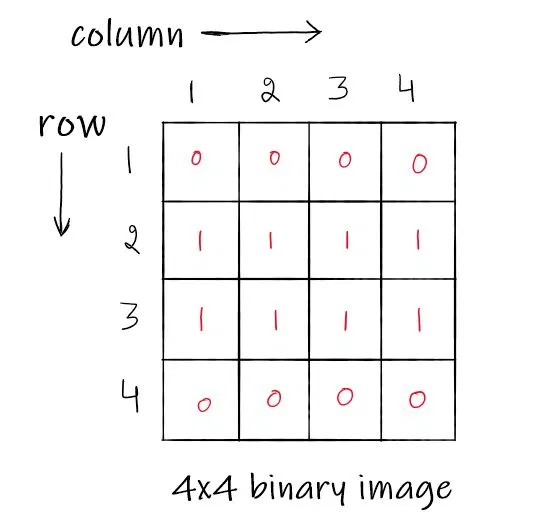

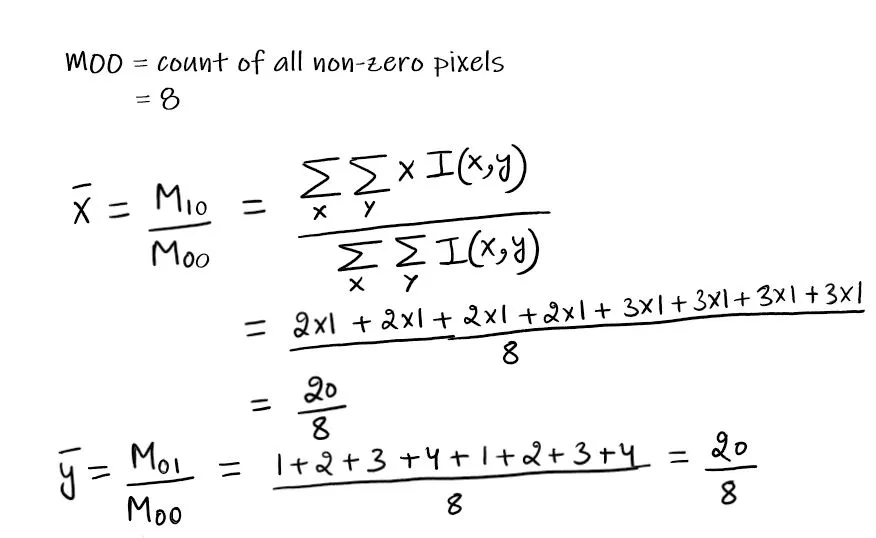

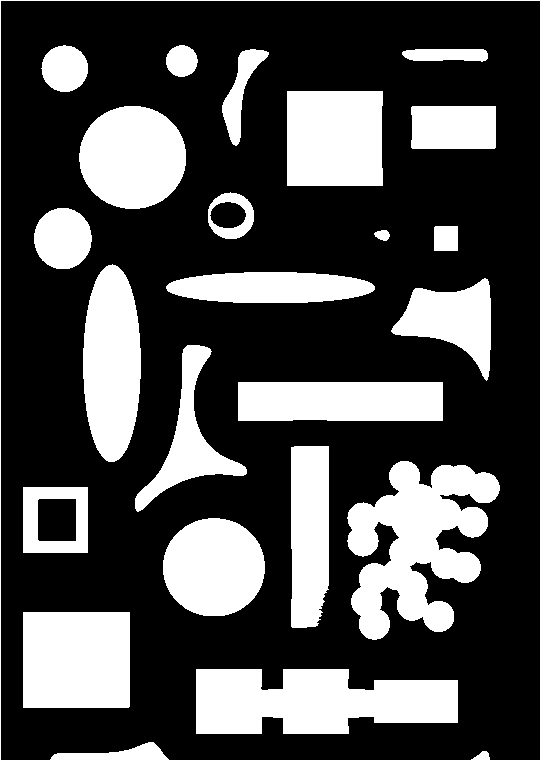

Area: 86.5, perimeter: 45.55634891986847
Area: 959.5, perimeter: 251.8406196832657
Area: 13091.5, perimeter: 754.0416301488876
Area: 10069.5, perimeter: 401.41421353816986
Area: 7780.0, perimeter: 329.22034430503845
Area: 4160.0, perimeter: 258.0
Area: 1672.0, perimeter: 160.48528122901917
Area: 14515.0, perimeter: 1225.768675327301
Area: 6357.0, perimeter: 446.9116872549057
Area: 7718.0, perimeter: 484.8284270763397
Area: 4592.5, perimeter: 502.0315263271332
Area: 5014.0, perimeter: 357.2792183160782
Area: 5019.0, perimeter: 444.3675308227539
Area: 8829.0, perimeter: 450.5929263830185
Area: 108.0, perimeter: 41.79898953437805
Area: 551.5, perimeter: 93.41421353816986
Area: 2707.5, perimeter: 194.75230765342712
Area: 1644.5, perimeter: 152.1248904466629
Area: 767.0, perimeter: 105.74011433124542
Area: 3501.5, perimeter: 251.0710676908493
Area: 8556.0, perimeter: 345.70562493801117
Area: 8868.0, perimeter: 378.8284270763397
Area: 865.0, perimeter: 185.4558435678482
Area: 1482.0, perimet

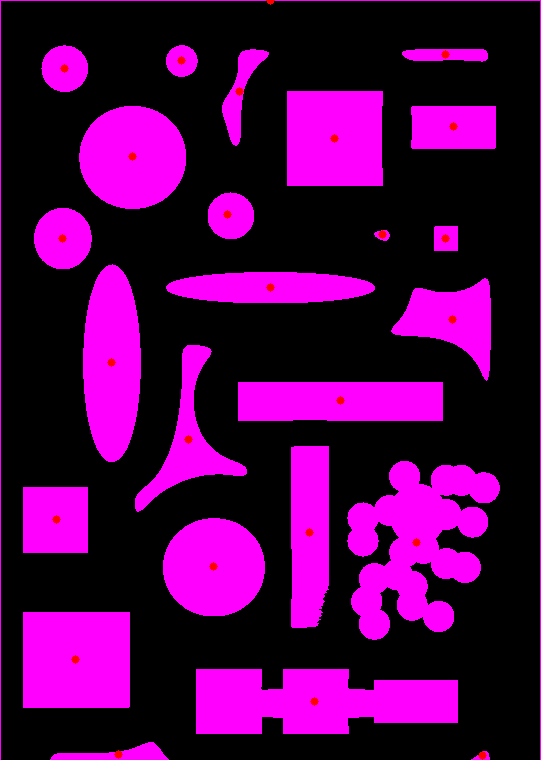

In [ ]:
img = cv2.imread(images_path+'blob.png',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2_imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

objects = np.zeros([img.shape[0], img.shape[1],3], 'uint8')
for c in contours:
	cv2.drawContours(objects, [c], -1, color, -1)

	area = cv2.contourArea(c)
 #(contour,isClosed)
	perimeter = cv2.arcLength(c, True)

	M = cv2.moments(c)
	cx = int( M['m10']/M['m00'])
	cy = int( M['m01']/M['m00'])
	cv2.circle(objects, (cx,cy), 4, (0,0,255), -1)

	print("Area: {}, perimeter: {}".format(area,perimeter))

cv2_imshow(objects)

cv2.waitKey(0)
cv2.destroyAllWindows()


**Edge Detection:**
Convolution Operation: is the process of adding each element of the image to its local neighbors, weighted by the kernel. 


Sobel Filter:The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. 

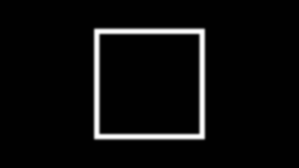

Vertical Edges


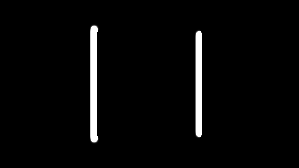

Horizontal Edges


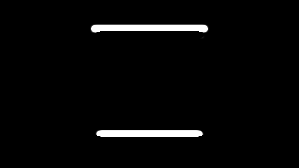

All Edges


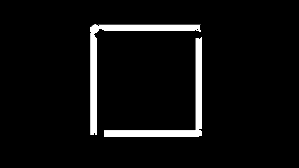

In [ ]:
img = cv2.imread(images_path+'Square.png',1)
blurred_img = cv2.GaussianBlur(img,(5,5),0)

# Q: Why did we blur?
cv2_imshow(blurred_img)
#sobelx = cv2.Sobel(src=blurred_img, ddepth=cv2.CV_64F(Codec: float 64-bit), dx=1, dy=0, ksize=5)
sobelx = cv2.Sobel(blurred_img,cv2.CV_64F,1,0,ksize=5)  # x - vertical edges
print("Vertical Edges")
cv2_imshow(sobelx)

print("Horizontal Edges")
sobely = cv2.Sobel(blurred_img,cv2.CV_64F,0,1,ksize=5)  # y - horizontal edge
cv2_imshow(sobely)

print("All Edges")
cv2_imshow(cv2.bitwise_or(sobelx, sobely))

Finding Canny Edges:
It involves multiple steps
1. Noise Reduction using Guassian Filter
2. Finding intensity Gradient of the image: Finding edge gradient and pixel direction using Sobel Filter
3. Non-maximum Suppression - Every pixel is scanned until unwanted pixels not related to edge are removed
4. Hysterisis thresholding - Finds edges which falls between min and max 
thresholds


---


OpenCV puts all the above in single function, cv.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Fourth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

Original Image


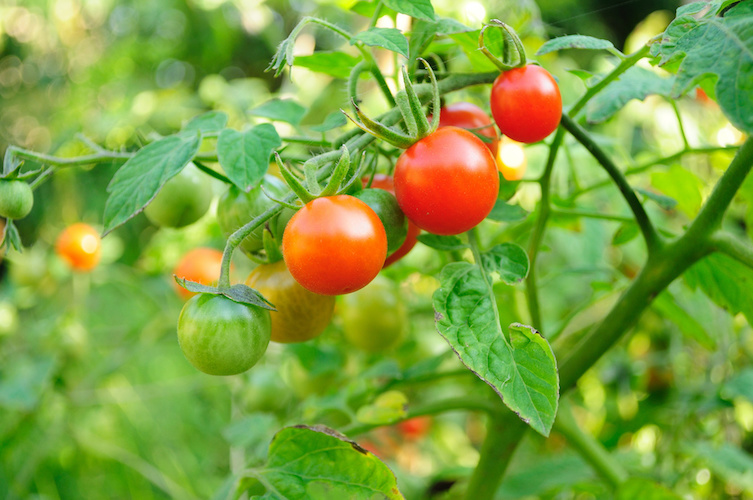

After applying Canny Edges


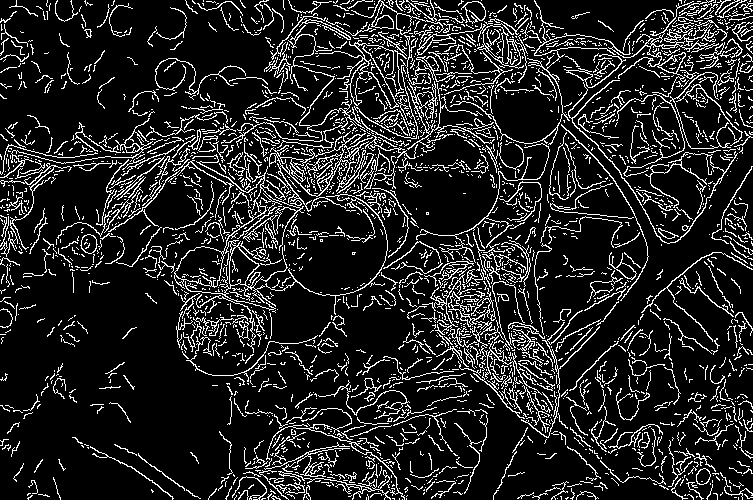

In [ ]:
#Finding Edges in a Colored Image
img = cv2.imread(images_path+"tomatoes.jpg",1)
print("Original Image")
cv2_imshow(img)
#Using highest and lowest thresholds
edges = cv2.Canny(img, 100, 70)
print("After applying Canny Edges")
cv2_imshow(edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

Finding Objects

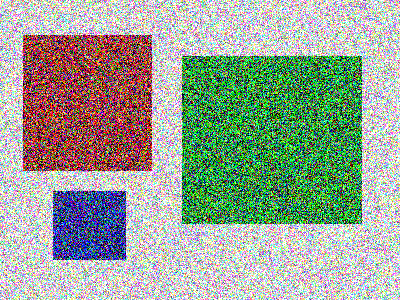

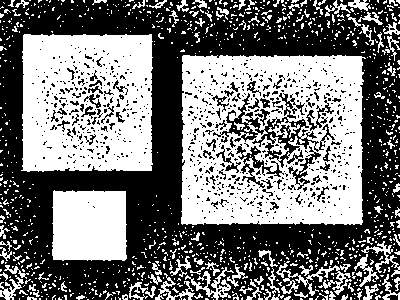

2054
4
4926.0 298.2253956794739
29882.0 795.3868639469147
1038.0 645.0681030750275
17250.0 585.0782079696655


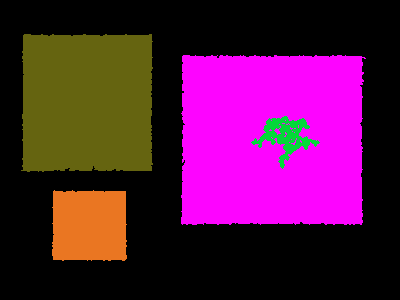

3
4926.0 298.2253956794739
29882.0 795.3868639469147
17250.0 585.0782079696655


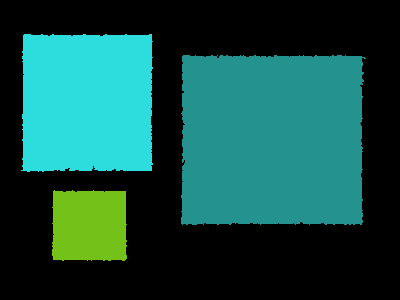

In [ ]:
#Finding Edges from a blurred image
img = cv2.imread(images_path+"fuzzy.png",1)
cv2_imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3),0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 205, 1)
cv2_imshow(thresh)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filtered = []
for c in contours:
	if cv2.contourArea(c) < 1000:continue
	filtered.append(c)

print(len(filtered))

objects = np.zeros([img.shape[0],img.shape[1],3], 'uint8')
for c in filtered:
	col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
	cv2.drawContours(objects,[c], -1, col, -1)
	area = cv2.contourArea(c)
	p = cv2.arcLength(c,True)
	print(area,p)

cv2_imshow(objects)

#Increasing the threshold and removing other objects	
filtered = []
for c in contours:
	if cv2.contourArea(c) < 1500:continue
	filtered.append(c)

print(len(filtered))

objects = np.zeros([img.shape[0],img.shape[1],3], 'uint8')
for c in filtered:
	col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
	cv2.drawContours(objects,[c], -1, col, -1)
	area = cv2.contourArea(c)
	p = cv2.arcLength(c,True)
	print(area,p)

cv2_imshow(objects)
	


cv2.waitKey(0)
cv2.destroyAllWindows()